In [6]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_collections =     {
            "leastcloudy": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/leastcloudy/0531",
                },
            "diffcr": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/diffcr/init_0529_pretrain",
                },
            "ctgan": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_repro",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/ctgan/init_0529_allclear_ep41",
                },
            "pmaa": 
                {
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_pretrain_new",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/pmaa/init_0529_allclear_epoch25",
                },
            "uncrtaints": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_pretrained_no_s1",
                    "allclear_with_s1": "/share/hariharan/cloud_removal/results/baselines/uncrtaints/init_0529_allclear_EP20",
                },
            "utilise": 
                {
                    "with_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_w_s1/",
                    "wo_s1": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_pretrain_wo_s1",
                    "allclear_rgb": "/share/hariharan/cloud_removal/results/baselines/utilise/init_0529_allclear_band4_EP400",
                },
        }

df = pd.DataFrame.from_dict(path_collections, orient="index")
df = df.reset_index().melt(id_vars=['index'], var_name='type', value_name='path').dropna(subset=['path'], inplace=False)
df = df.reset_index()
del df["level_0"]

In [7]:
df["MAE"] = 0.
df["RMSE"] = 0.
df["PSNR"] = 0.
df["SAM"] = 0.
df["SSIM"] = 0.
for row_id, row in df.iterrows():
    # print(row_id, row["index"], row["type"], row["path"])
    fpath = os.path.join(row["path"], row["index"] + "_results.csv")
    temp_df = pd.read_csv(fpath)
    df.iloc[row_id, 3] = temp_df["MAE"].values[0]
    df.iloc[row_id, 4] = temp_df["RMSE"].values[0]
    df.iloc[row_id, 5] = temp_df["PSNR"].values[0]
    df.iloc[row_id, 6] = temp_df["SAM"].values[0]
    df.iloc[row_id, 7] = temp_df["SSIM"].values[0]

In [8]:
df = df[~((df["index"]=="uncrtaints")&(df["type"]=="wo_s1"))] 
df = df[~((df["index"]=="utilise")&(df["type"]=="wo_s1"))] 
df = df[~((df["index"]=="leastcloudy"))] 
df = df[~((df["index"]=="diffcr"))] 
df = df.reset_index()

In [9]:
df

,level_0,index,type,path,MAE,RMSE,PSNR,SAM,SSIM
0,2,ctgan,wo_s1,/share/hariharan/cloud_removal/results/baselin...,0.105206,0.119767,22.264559,9.770962,0.706866
1,3,pmaa,wo_s1,/share/hariharan/cloud_removal/results/baselin...,0.100125,0.109770,23.057087,9.517859,0.730822
2,6,ctgan,allclear_rgb,/share/hariharan/cloud_removal/results/baselin...,0.051628,0.063383,26.919279,9.066089,0.809000
3,7,pmaa,allclear_rgb,/share/hariharan/cloud_removal/results/baselin...,0.035942,0.044074,30.859949,6.172794,0.884189
4,8,utilise,allclear_rgb,/share/hariharan/cloud_removal/results/baselin...,0.095702,0.107112,27.030134,8.133468,0.811875
5,9,uncrtaints,with_s1,/share/hariharan/cloud_removal/results/baselin...,0.046409,0.060050,28.897310,6.197063,0.887383
6,10,utilise,with_s1,/share/hariharan/cloud_removal/results/baselin...,0.089667,0.104731,23.610992,7.956638,0.794346
7,11,uncrtaints,allclear_with_s1,/share/hariharan/cloud_removal/results/baselin...,0.039683,0.051578,30.466158,6.588620,0.895244


/tmp/ipykernel_2034218/939834.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='combination', y=metric, data=sorted_df, palette=palette, zorder=2)
/tmp/ipykernel_2034218/939834.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='combination', y=metric, data=sorted_df, palette=palette, zorder=2)
/tmp/ipykernel_2034218/939834.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='combination', y=metric, data=sorted_df, palette=palette, zorder=2)
/tmp/ipykernel_2034218/939834.py:62: FutureWarning: 

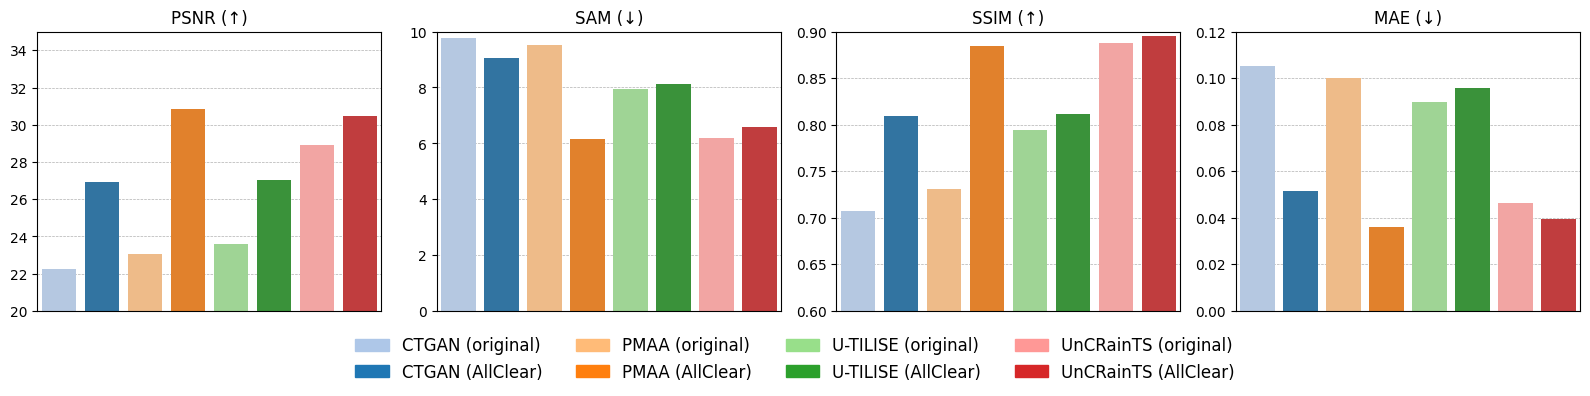

In [11]:
# Mapping the combinations to more readable formats
df['combination'] = df['index'] + " + " + df['type']

# Define the order of combinations
order = [
    'ctgan + wo_s1', 'ctgan + allclear_rgb',
    'pmaa + wo_s1', 'pmaa + allclear_rgb',
    'utilise + with_s1', 'utilise + allclear_rgb',
    'uncrtaints + with_s1', 'uncrtaints + allclear_with_s1'
]

# Define the metrics to plot
metrics = ['PSNR', 'SAM', 'SSIM', 'MAE']

# Define custom y-axis limits for each metric
y_limits = {
    'MAE': (0, 0.12),
    'PSNR': (20, 35),
    'SAM': (0, 10),
    'SSIM': (0.6, 0.9)
}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes = axes.flatten()

# Define a colormap
colors = sns.color_palette("tab20", len(order))

# Function to swap even and odd colors
def swap_even_odd_colors(colors):
    swapped_colors = colors[:]
    for i in range(0, len(colors) - 1, 2):
        swapped_colors[i], swapped_colors[i + 1] = colors[i + 1], colors[i]
    return swapped_colors

# Swap the colors
swapped_colors = swap_even_odd_colors(colors)

# Create a color mapping with swapped colors
color_mapping = {comb: color for comb, color in zip(order, swapped_colors)}

# Formalize legend labels
legend_labels = {
    'ctgan + wo_s1': 'CTGAN (original)',
    'ctgan + allclear_rgb': 'CTGAN (AllClear)',
    'pmaa + wo_s1': 'PMAA (original)',
    'pmaa + allclear_rgb': 'PMAA (AllClear)',
    'utilise + with_s1': 'U-TILISE (original)',
    'utilise + allclear_rgb': 'U-TILISE (AllClear)',
    'uncrtaints + with_s1': 'UnCRainTS (original)',
    'uncrtaints + allclear_with_s1': 'UnCRainTS (AllClear)'
}

# Plot each metric
for i, metric in enumerate(metrics):
    # Sort the data by the specified order to assign colors properly
    sorted_df = df.set_index('combination').loc[order].reset_index()
    
    # Plot with sorted colors
    palette = [color_mapping[comb] for comb in sorted_df['combination']]
    sns.barplot(ax=axes[i], x='combination', y=metric, data=sorted_df, palette=palette, zorder=2)
    
    # Customize title with arrows
    arrow = "↑" if metric in ['PSNR', 'SSIM'] else "↓"
    axes[i].set_title(f"{metric} ({arrow})", fontsize=12)
    
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_xticks([])
    axes[i].set_ylabel("")
    axes[i].set_ylim(y_limits[metric])
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

# Add legend at the bottom of the subplots
handles = [plt.Rectangle((0,0),1,1, color=color_mapping[comb]) for comb in order]
labels = [legend_labels[comb] for comb in order]
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=12, frameon=False)

plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust layout to make space for the legend
plt.savefig("./exp_0531_comparison.png")
# plt.show()